In [217]:
"""
ARX Estimation - Tclab

@author: Jeferson Gallego Chaverra
"""
from sympy import MatrixSymbol, Matrix, Identity
import sympy as sym
sym.init_printing()
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import control as cl
from sklearn.metrics import *

def validar_Dato(frase):

    while True:
            valor= input(frase)     
            if valor.isnumeric():
                valor = int(valor)
                break
            else:
                print('El dato ingresado no es numerico , por favor ingresar un dato numerico')

    return valor

def limites(frase,minimo,maximo):    
    flag=True
    while flag:
        y=validar_Dato(frase)
        if y<=maximo and y>=minimo:
            flag=False
        else:
            print(f'El dato ingresado esta por fuera de los limites establecidos min {minimo} y max {maximo}')

    return y

## Autoregressive Polynomials (ARX Model) 

## Upload Data

30.38


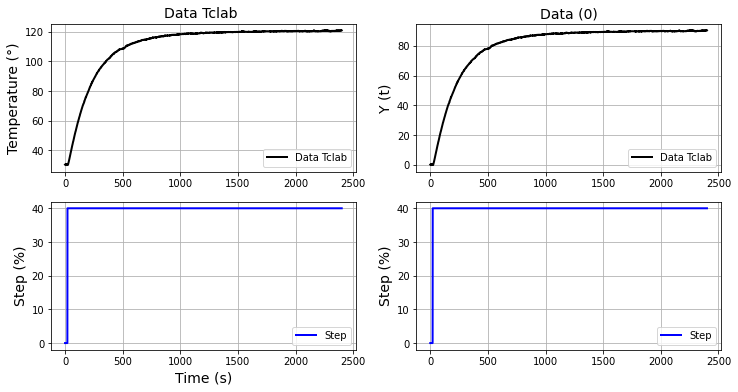

In [218]:
# Upload Data 
x =limites('DATA 1 OR 2?',1,2)

# Data
if x == 1:
     data = np.loadtxt('25.txt',delimiter=',',skiprows=1)
     I = 25
elif x == 2:
     data = np.loadtxt('40.txt',delimiter=',',skiprows=1)
     I = 40 

# Zero

Zero = 20

# Tclab Data
t1 = data[:,0].T 
u1 = data[:,1].T
y1 = data[:,2].T
dt = t1[1]-t1[0]

# Y ---> Zero
Z = y1[Zero]
print(Z)
y2 = y1 - Z

# Iteraciones
N = len(y2)

# Plot
plt.figure(figsize=(12,6))
 
# Subplot Data
ax=plt.subplot(2,2,1)
ax.grid()
plt.title("Data Tclab ",fontsize = 14)
plt.plot(t1, y1, 'k', linewidth=2, label='Data Tclab')
plt.ylabel('Temperature (°)', fontsize = 14)
plt.legend(loc='best')

ax=plt.subplot(2,2,2)
ax.grid()
plt.title("Data (0)",fontsize = 14)
plt.plot(t1, y2, 'k', linewidth=2, label='Data Tclab')
plt.ylabel('Y (t)', fontsize = 14)
plt.legend(loc='best')

# Subplot Step          
ax=plt.subplot(2,2,3)
ax.grid()
plt.plot(t1, u1, 'b-', linewidth=2, label='Step')
plt.ylabel('Step (%)', fontsize = 14)
plt.xlabel('Time (s)', fontsize = 14)
plt.legend(loc='best')

ax=plt.subplot(2,2,4)
ax.grid()
plt.plot(t1, u1, 'b-', linewidth=2, label='Step')
plt.ylabel('Step (%)', fontsize = 14)
plt.legend(loc='best')
plt.show()

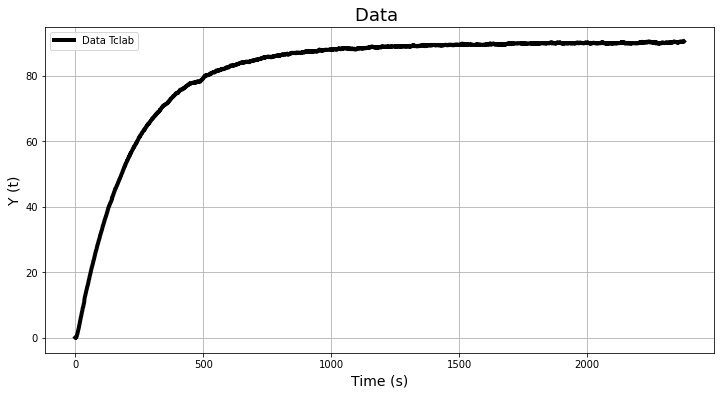

In [219]:
# Zero Step Time = 20 Seg
Zero = 20

# Simulation Time 
t0 = data[Zero:,0].T 
tf = len(t0) - 1
dt = 1
t = np.linspace(0,tf,int(tf/dt)+1)

# Vector Y (t)
y = y2[Zero:]
u = u1[Zero:]

# Iterations
N=len(y)
       
plt.figure(figsize=(12,6))
plt.title("Data ",fontsize = 18)
plt.plot(t, y, 'k', linewidth=4, label='Data Tclab')
plt.ylabel('Y (t)', fontsize = 14)
plt.xlabel('Time (s)', fontsize = 14)
plt.legend(loc='best')
plt.grid()

## Model Ge
$$G_e(z) = \frac{B(z)}{A(z)}$$
$$(1) = \frac{b_1z^{-1}+b_2z^{-2}}{1+a_1z^{-1}+a_{2}z^{-2}}$$
$$(2) = \frac{b_1z^{-1}}{1+a_1z^{-1}+a_{2}z^{-2}}$$
$$(3) = \frac{b_1z^{-1}}{1+a_1z^{-1}}$$
$$(4) = \frac{b_1z^{-1}+b_2z^{-2}}{1+a_1z^{-1}}$$

In [220]:
# Vectors of States

y_1 = np.zeros(N)
y_2 = np.zeros(N)
u_1 = np.zeros(N)
u_2 = np.zeros(N)
    
for k in range(1,N):
    y_1[k]=y[k-1]
    u_1[k]=u[k-1]
for k in range(2,N):
    y_2[k]=y[k-2]
    u_2[k]=u[k-2]



## $\phi$ 

In [221]:
x =limites('Ingrese Tipo de Ge',1,4)

## Phi Vector
if x==1:
        phi = np.array([-y_1,-y_2,u_1,u_2]).transpose()
elif x == 2:
        phi = np.array([-y_1,-y_2,u_1,]).transpose()
elif x == 3:
      phi = np.array([-y_1,u_1,]).transpose()
elif x == 4:
      phi = np.array([-y_1,u_1,u_2]).transpose()

##  $\theta$

$$ \theta = (\theta^{T}\theta)^{-1} \theta^{T} yn 

In [222]:
alpha = 0.9
A = np.dot(phi.T,phi) + alpha*np.eye(len(np.dot(phi.T,phi)))
theta = np.dot(np.linalg.inv(A),np.dot(phi.T,y))
theta

array([-0.65014701, -0.34392809, -0.00248973,  0.01576843])

## Polinomial
## Transfer Function
$$G_e(z) = \frac{B(z)}{A(z)}$$

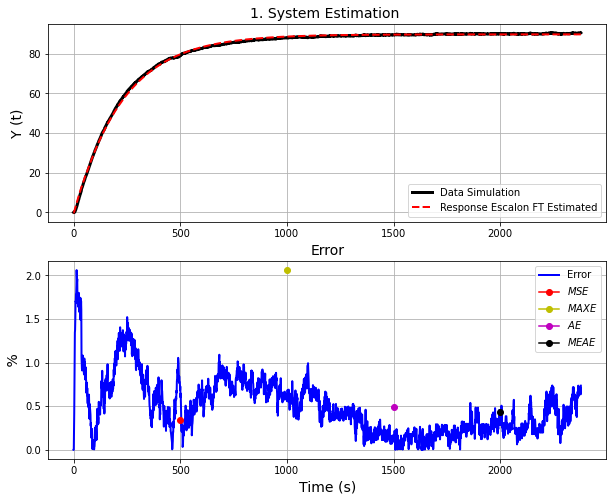

In [223]:
z = sym.symbols('z', complex=True) # z=Simbolo

# Polinomial B(z) / A(z)

if x==1:
       A = 1 + theta[0]*z**-1 + theta[1]*z**-2  
       B = theta[2]*z**-1 + theta[3]*z**-2
elif x == 2:
       A = 1 + theta[0]*z**-1 + theta[1]*z**-2  
       B = theta[2]*z**-1
elif x == 3:
       A = 1 + theta[0]*z**-1
       B = theta[1]*z**-1
elif x ==4:
       A = 1 + theta[0]*z**-1 
       B = theta[1]*z**-1 + theta[2]*z**-2


G = B/A
G = G.simplify()

# Transfer Function Estimation

if x==1:
       #G_1
       G_e = cl.tf([theta[2], theta[3]],[1, theta[0], theta[1]],dt) 
elif x == 2:
       #G_1
       G_e = cl.tf([theta[2]],[1, theta[0], theta[1]],dt)
elif x == 3:
       #G_3
       G_e = cl.tf([theta[1]],[1, theta[0],],dt) 
elif x ==4:
       #G_4
       G_e = cl.tf([theta[1], theta[2]],[1, theta[0]],dt)

# Step Response
_,ye = cl.step_response(G_e,N-4)

ye = ye * I

# Error
e = np.abs(y[0:len(ye)] - ye[0:len(ye)])
y[0:len(ye)]-ye[0:len(ye)]

# Evaluation Criteria 
MSE = mean_squared_error(y[0:len(ye)],ye[0:len(ye)])
MAXE = max_error(y[0:len(ye)],ye[0:len(ye)])
MAE = mean_absolute_error(y[0:len(ye)],ye[0:len(ye)])
MEAE = median_absolute_error(y[0:len(ye)],ye[0:len(ye)])

# Plot
plt.figure(figsize=(10,8))

ax=plt.subplot(2,1,1)
ax.grid()
plt.title("1. System Estimation ",fontsize = 14)
plt.plot(t1[0:len(ye)],y[0:len(ye)],'k', linewidth=3, label='Data Simulation')
plt.plot(t1[0:len(ye)],ye[0:len(ye)], 'r--', linewidth=2, label='Response Escalon FT Estimated')
plt.ylabel('Y (t)', fontsize = 14)
plt.legend(loc='best')

ax=plt.subplot(2,1,2)
ax.grid()
plt.title("Error",fontsize = 14)
plt.plot(t1[0:len(ye)],e[0:len(ye)], 'b-', linewidth=2, label='Error')
plt.plot(500,MSE, marker="o", color="r",label=r'$MSE$')
plt.plot(1000,MAXE, marker="o", color="y",label=r'$MAXE$')
plt.plot(1500,MAE, marker="o", color="m",label=r'$AE$')
plt.plot(2000,MEAE, marker="o", color="k",label=r'$MEAE$')
plt.xlabel('Time (s)', fontsize = 14)
plt.ylabel(' % ', fontsize = 14)
plt.legend(loc='best')
plt.show()

In [224]:
## FT  Estimated 
print(f"Ge =     {G_e}")
print(f"Mean Squared Error   =  {MSE:.4f}")
print(f"MAX Error            =  {MAXE:.4f}")
print(f"Absolute Error       =  {MAE:.4f}")
print(f"Mean Absolute Error  =  {MEAE:.4f}")


Ge =     
 -0.00249 z + 0.01577
-----------------------
z^2 - 0.6501 z - 0.3439

dt = 1

Mean Squared Error   =  0.3460
MAX Error            =  2.0605
Absolute Error       =  0.4901
Mean Absolute Error  =  0.4317


## Y_r [k]

$$y_e[k] = (1 - A)*y[k] + B*u[k]$$

$$(1) = y_e[k] = - a_1*y[k-1] - a_2*y[k-2] + b_1*u[k-1] + b_2*u[k-2]$$
$$(2) = y_e[k] = - a_1*y[k-1] - a_2*y[k-2] + b_1*u[k-1]$$
$$(3) = y_e[k] = - a_1*y[k-1] + b_1*u[k-1]$$
$$(4) = y_e[k] = - a_1*y[k-1] + b_1*u[k-1] + b_2*u[k-2]$$

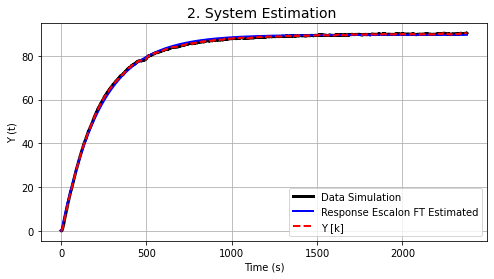

In [225]:
# Response Y[K]=  Estimated Response

if x==1:
       #G_1
       yr = -theta[0]*y_1-theta[1]*y_2+theta[2]*u_1+theta[3]*u_2
elif x == 2:
       #G_2
       yr = -theta[0]*y_1-theta[1]*y_2+theta[2]*u_1
elif x == 3:
       #G_3
       yr = -theta[0]*y_1+theta[1]*u_1
elif x ==4:
       #G_4
       yr = -theta[0]*y_1+theta[1]*u_1+theta[2]*u_2

# Plot
plt.figure(figsize=(8,4))
plt.plot(t1[0:len(ye)],y[0:len(ye)],'k', linewidth=3, label='Data Simulation')
plt.plot(t1[0:len(ye)],ye[0:len(ye)], 'b-', linewidth=2, label='Response Escalon FT Estimated')
plt.plot(t1[0:len(ye)],yr[0:len(ye)], 'r--', linewidth=2, label='Y [k]')
plt.title("2. System Estimation ",fontsize = 14)
plt.ylabel('Y (t)')
plt.xlabel('Time (s)')
plt.legend(loc= 'best')
plt.grid()
plt.show()